In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP DATA SCIENCE/inventario/sales_data.csv')

print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")


Número de filas: 76000
Número de columnas: 16


In [ ]:
# Ver las primeras filas
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Month
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,2022-01
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229,2022-01
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157,2022-01
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52,2022-01
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59,2022-01


In [ ]:
df['Category'].unique()

array(['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture'],
      dtype=object)

**PREGUNTA = ¿Cómo varía la demanda según la región y la estación del año?**

In [ ]:
# Agrupar por Región y Temporada, calcular promedio de la demanda
region_season_demand = df.groupby(["Date" ,'Region', 'Seasonality', "Category"])['Demand'].mean().reset_index()

# Mostrar los resultados
region_season_demand


,Date,Region,Seasonality,Category,Demand
0,2022-01-01,East,Winter,Clothing,75.000000
1,2022-01-01,East,Winter,Electronics,127.666667
2,2022-01-01,East,Winter,Furniture,79.000000
3,2022-01-01,East,Winter,Groceries,121.111111
4,2022-01-01,East,Winter,Toys,101.666667
...,...,...,...,...,...
14435,2024-01-30,South,Winter,Toys,86.333333
14436,2024-01-30,West,Winter,Clothing,113.600000
14437,2024-01-30,West,Winter,Electronics,91.000000
14438,2024-01-30,West,Winter,Furniture,58.428571


In [ ]:
# Ordenar la tabla por demanda de mayor a menor
region_season_demand_sorted = region_season_demand.sort_values(by='Demand', ascending=False)

# Mostrar los resultados ordenados
region_season_demand_sorted


,Date,Region,Seasonality,Category,Demand
8262,2023-03-11,West,Spring,Electronics,233.000000
13946,2024-01-05,East,Winter,Clothing,230.000000
8336,2023-03-15,South,Spring,Toys,225.333333
9936,2023-06-07,West,Summer,Groceries,222.857143
746,2022-02-09,North,Winter,Clothing,222.750000
...,...,...,...,...,...
3472,2022-07-02,South,Summer,Toys,12.000000
12364,2023-10-13,South,Autumn,Toys,11.666667
13779,2023-12-27,East,Winter,Toys,11.000000
3227,2022-06-19,West,Summer,Electronics,9.000000


In [ ]:
# Asegurarse de que la columna 'Date' es datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año
df['Year'] = df['Date'].dt.year

# Agrupar por Año, Categoría y Seasonality y calcular la demanda promedio
table_year_category_season = df.groupby(['Year', 'Category', 'Seasonality'])['Demand'].mean().reset_index()

# Ordenar por año y demanda descendente (opcional)
table_year_category_season = table_year_category_season.sort_values(by=['Year', 'Demand'], ascending=[True, False])

# Mostrar la tabla
table_year_category_season


,Year,Category,Seasonality,Demand
14,2022,Groceries,Summer,133.635598
3,2022,Clothing,Winter,128.643750
15,2022,Groceries,Winter,123.414722
12,2022,Groceries,Autumn,122.079121
13,2022,Groceries,Spring,109.526630
1,2022,Clothing,Spring,108.451087
7,2022,Electronics,Winter,107.319444
2,2022,Clothing,Summer,107.118207
0,2022,Clothing,Autumn,106.066621
4,2022,Electronics,Autumn,105.055861


<ipython-input-33-9c30aba2f365>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


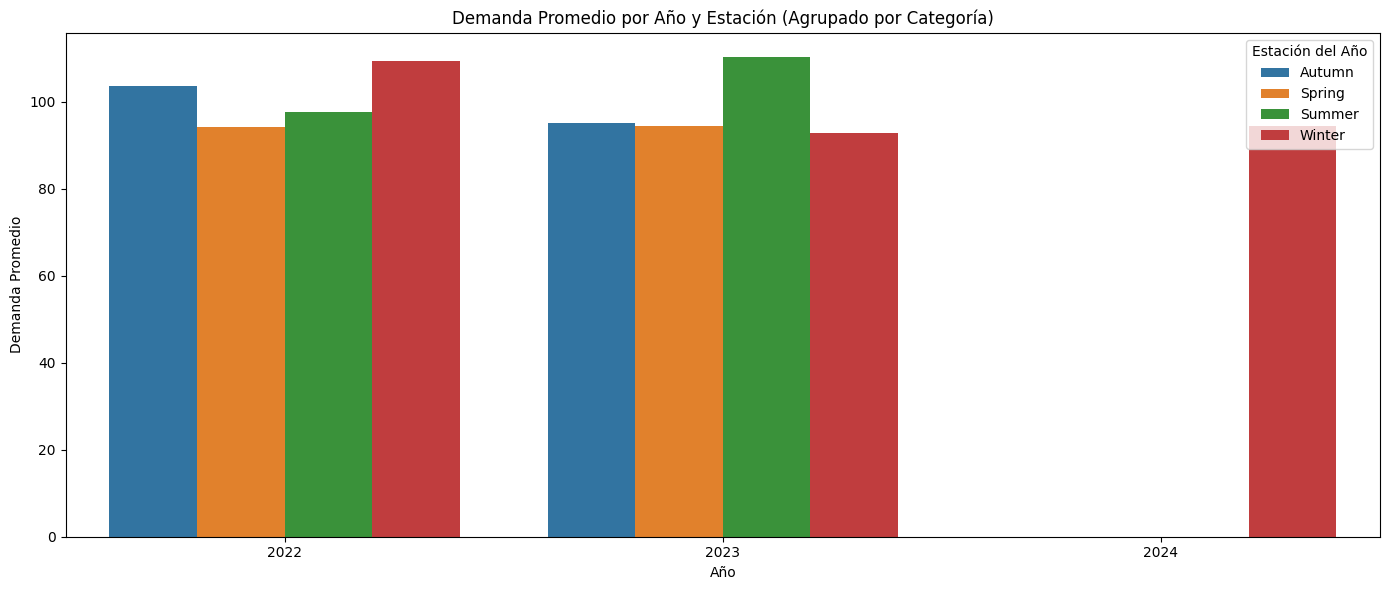

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el dataframe agrupado (si no lo tienes aún)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_grouped = df.groupby(['Year', 'Category', 'Seasonality'])['Demand'].mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_grouped,
    x='Year',
    y='Demand',
    hue='Seasonality',
    ci=None
)

plt.title('Demanda Promedio por Año y Estación (Agrupado por Categoría)')
plt.xlabel('Año')
plt.ylabel('Demanda Promedio')
plt.legend(title='Estación del Año')
plt.tight_layout()
plt.show()


**¿CUANTAS VENTAS SE HICIERON POR REGION? Y ¿EL CAMBIO DE ESTACION AFECTO LAS VENTAS?**

In [ ]:
ventas_por_region = df.groupby('Region').size().reset_index(name='Ventas')
ventas_por_region

,Region,Ventas
0,East,15200
1,North,30400
2,South,15200
3,West,15200


In [ ]:
ventas_por_estacion = df['Seasonality'].value_counts()
print(ventas_por_estacion)

Seasonality
Winter    21000
Spring    18400
Summer    18400
Autumn    18200
Name: count, dtype: int64


In [ ]:
ventas_region_estacion = df.groupby(['Region', 'Seasonality']).size().unstack()
print(ventas_region_estacion)

Seasonality  Autumn  Spring  Summer  Winter
Region                                     
East           3640    3680    3680    4200
North          7280    7360    7360    8400
South          3640    3680    3680    4200
West           3640    3680    3680    4200


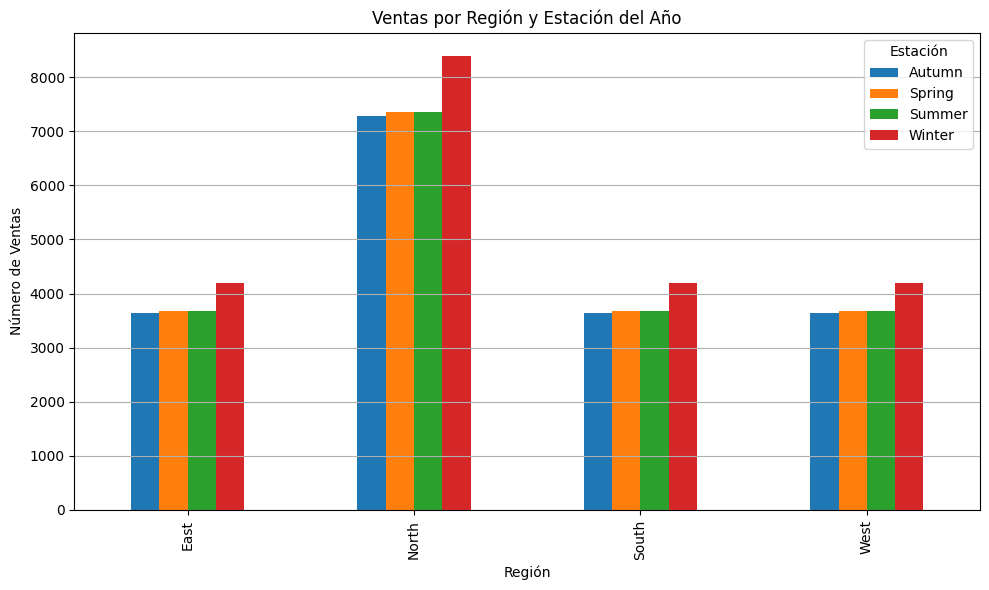

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
ventas_region_estacion.plot(kind='bar', figsize=(10,6))

# Añadir títulos y etiquetas
plt.title('Ventas por Región y Estación del Año')
plt.xlabel('Región')
plt.ylabel('Número de Ventas')
plt.legend(title='Estación')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar gráfico
plt.show()
